# Mini-projet Exploration de données et Apprentissage

Chenrui ZHU - Xianxiang ZHANG - Xiangyong LI


## 1  Choix du jeu de données
https://www.data.gouv.fr/fr/datasets/donnees-de-consommations-et-habitudes-alimentaires-de-letude-inca-3/

## 2  Travail demandé

### 2.1  Présentation des données 

#### 2.1.1  Jeu de données de INCA3

##### Source et Conditions de Recueil
Les données de l'étude INCA3 proviennent d'une enquête menée en France métropolitaine entre 2014 et 2015. Cette enquête a été conçue pour évaluer les habitudes alimentaires, les apports nutritionnels, les pratiques de préparation et de conservation des aliments, ainsi que les niveaux d'activité physique et de sédentarité de la population française âgée de 0 à 79 ans.

##### Nombre de Fichiers, Variables et Individus
Les données de l'étude INCA3 sont organisées en 11 tables distinctes, chacune contenant des informations spécifiques. Ces tables regroupent une quantité variable de variables et d'individus.

##### Signification des Individus et des Variables
- **Individus :** Ces représentent les personnes incluses dans l'étude, de la petite enfance (0 ans) jusqu'à l'âge de 79 ans. Les données sont probablement segmentées par groupes d'âge pour permettre des analyses spécifiques.
- **Variables :** Elles décrivent différents aspects des habitudes alimentaires et du mode de vie des individus. Cela peut inclure des informations sur les types d'aliments consommés, les quantités, les apports nutritionnels (vitamines, minéraux, etc.), les méthodes de préparation des aliments, les activités physiques pratiquées, les mesures anthropométriques (poids, taille, etc.), et d'autres paramètres pertinents pour évaluer la santé nutritionnelle et les habitudes de vie.

Nous avons choisi d'analyser 4 tables dans un ensemble de données aussi vaste:

- **DESCRIPTION_INDIV**: Cette table contient les données des questionnaires face-à-face relatifs aux volets « Socio-économique » et « Mesures anthropométriques » et des données des questionnaires auto-administrés relatifs aux volets « Etat de santé » et « Tabagisme ». Elle inclut également les différentes variables de pondération, les variables nécessaires à la déclaration du plan de sondage complexe de l’étude ainsi que les variables relatives à la sous ou sur-déclaration en termes de consommations alimentaires. Elle regroupe les informations suivantes : caractéristiques socio-démographiques de l’individu (ou de son représentant dans le cas des enfants), caractéristiques socio-démographiques de la personne de référence du foyer, niveau de vie du foyer, insécurité alimentaire, caractéristiques anthropométriques (poids, taille, indice de masse corporelle, statut pondéral) ; statut vis-à-vis d’allergies ou d’intolérances alimentaires, types de régimes alimentaires, types d’allergies ou d’intolérances alimentaires, régimes et histoire pondérale, statut vis-à-vis de la grossesse, de l’allaitement et de la ménopause (uniquement pour les femmes de 15 ans et plus), statut tabagique ; indicateurs de sous ou sur-déclaration en termes de consommations alimentaires.

- **Table HABITUDES_INDIV**: Cette table contient les données des questionnaires auto-administrés relatifs aux volets « Habitudes alimentaires » et « Origine des aliments ». Elle regroupe les informations suivantes : lieux et occasions de consommation, consommations hors-foyer et entre les repas, préférences alimentaires, présence de sel/beurre/sauce sur la table au moment des repas, lecture des étiquettes, sources d’informations en alimentation, consommation de denrées animales crues et des croûtes de fromage, préparation des fruits et légumes crus, spécificités de l'alimentation des enfants de 0 à 35 mois (ex : allaitement (exclusif ou partiel), type de laits consommés, diversification alimentaire, matériaux des biberons et des tétines, préparation, stockage et conservation des biberons de lait, mode de chauffage des laits et contenants utilisés), autoconsommation et utilisation de produits phytosanitaires au potager, consommation d'aliments issus de l'agriculture biologique et cuisson des aliments au barbecue.

- **Table ACTPHYS_SEDENT**: Cette table contient les données des questionnaires auto-administrés (pour les adultes 18-79 ans) et face-à-face (pour les enfants 3-17 ans) relatifs au volet « Sédentarité, activité physique et loisirs ». Il n'y a pas de données relatives à cette thématique pour les enfants de 0-35 mois. Elle regroupe les informations suivantes : mode de transport du trajet domicile-travail, temps passé devant les écrans (télévision, jeux vidéo, ordinateur) pendant la semaine et le week-end, pratique et fréquence d'une activité physique (y compris dans le cadre scolaire), type d'activité physique pratiquée, niveau d'activité physique, niveau de sédentarité et profils d'activité physique.

- **Fréquentiel alimentaire (FPQ)**: Cette table contient les données des questionnaires auto-administrés relatifs au volet « Fréquentiel alimentaire ». Ce questionnaire n’était proposé qu’aux enfants ayant démarré la diversification alimentaire (ainsi 30 enfants de 0-35 mois n’y ont pas répondu). Elle regroupe les informations suivantes : consommation (oui/non) pour environ une soixantaine d’aliments ou groupes d’aliments, puis si oui, fréquence de consommation.

### 2.2 Questions

Nous essayons de combiner les données de quatre tables avec la table Ciqual pour faire une analyse approfondie.

**Identification de liens entre variables** :
1. Y a-t-il une corrélation entre les caractéristiques socio-démographiques de l'individu et ses habitudes alimentaires décrites dans les tables de données individuelles ?

**Possibilité d'expliquer une variable en fonction d'autres** :
2. Est-il possible d'expliquer les habitudes alimentaires décrites dans la table HABITUDES_INDIV en fonction des caractéristiques anthropométriques ou du statut de santé de la table DESCRIPTION_INDIV ?

**Prédiction d'un événement** :
3. Peut-on prédire le niveau d'activité physique ou de sédentarité d'un individu à partir des habitudes alimentaires et des caractéristiques socio-démographiques ?

**Mise en évidence de groupes homogènes** :
4. Peut-on regrouper les individus en clusters homogènes en fonction de leurs habitudes alimentaires et de leur niveau d'activité physique ?

Ces questions visent à exploiter la richesse des données en croisant différentes informations pour comprendre les relations entre les habitudes alimentaires, les caractéristiques socio-démographiques et le mode de vie, et éventuellement prédire certains comportements ou caractéristiques à partir de ces données interconnectées.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 3. Préparation des données

### 3.1 TABLE DESCRIPTION_INDIV

- **Sélection des données**: Comme les tables de INCAs comportent un très grand nombre de variables, nous ne choisissons pas plus de 15 variables par table pour répondre aux questions que nous avons posées dans le chapitre précédent.

NOIND
pop2: Participant AA (FAF+ AA individuel + AA ménage)
tps_travail_interv: Interviewé - Type de temps de travail
revenu: Revenu mensuel total du foyer (y c. alloc. sociales, pensions, loyers perçus)
IA_score: Score d'insécurité alimentaire
poids_m: Poids mesuré (kg)
regime_passe: Régime pour perdre du poids suivi par le passé
poids_modif: A essayé de perdre, ne pas prendre ou de gagner du poids depuis un an
nb_cigarettes_jour: Nombre de cigarettes fumées/jour
statnut: Statut nutritionnel
diplome_interv: Interviewé - Diplôme le plus élevé
bmr_kcal: Métabolisme de base estimé (équation de Henry) énergétique (kcal/j)
sousest0: Sous-estimateurs avec équations de Black et NAP ajustés (INCA3)
sousest1: Sous-estimateurs avec équations de Black pour les +18ans (idem INCA2)


In [ ]:
df_description = pd.read_csv('Datasets/description_indiv.csv', header= 0 , delimiter=';')

selected_data = df_description[df_description['pop2'] == 1]

selected_columns = ['NOIND', 'pop2', 'tps_travail_interv', 'revenu', 'IA_score', 'poids_m', 
                    'regime_passe', 'poids_modif', 'nb_cigarettes_jour', 'statnut', 'diplome_interv', 'bmr_kcal', 
                    'sousest0', 'sousest1']

for col in selected_columns:
    if col not in df_description.columns:
        print(f"Column '{col}' not found in the data.")

selected_data = selected_data[selected_columns]

selected_data.to_csv('Selected/description_indiv_selected.csv', index=False)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


- **Traitement des valeurs manquantes**: Nous pouvons constater qu'il y a beaucoup de données manquantes, et comme chaque variable représente une signification différente, nous ne pouvons pas simplement appliquer une méthode de remplissage unique à toutes les valeurs manquantes. Pour les variables dont les valeurs manquantes impliquent l'absence de ce comportement ou qui sont connues et définies par le grand public, nous remplissons les valeurs manquantes **en inscrivant des zéros ou des valeurs spécifiques**. Pour les autres valeurs manquantes, nous avons utilisé **la méthode du clustering et complété les valeurs manquantes par la valeur moyenne de chaque cluster** afin de rendre les données du tableau complètes.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# télécharger des données
df_description_indiv_selected = pd.read_csv('Selected/description_indiv_selected.csv', header= 0)

# Remplissez la valeur manquante d'une colonne spécifique comme 14
df_description_indiv_selected['diplome_interv'] = df_description_indiv_selected['diplome_interv'].fillna(14)

# Remplissez les valeurs manquantes avec 0 pour plusieurs colonnes
description_indiv_columns_to_fill = ['statnut', 'tps_travail_interv', 'regime_passe', 'nb_cigarettes_jour', 'sousest0', 'sousest1']
df_description_indiv_selected[description_indiv_columns_to_fill] = df_description_indiv_selected[description_indiv_columns_to_fill].fillna(0)


# Exclure les colonnes avec des valeurs manquantes et normaliser les données
features = df_description_indiv_selected.drop(columns=['IA_score', 'bmr_kcal', 'poids_m', 'poids_modif']).select_dtypes(include=['number'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Effectuer un clustering
kmeans = KMeans(n_clusters=3)  # Replace 3 with the determined number of clusters
clusters = kmeans.fit_predict(features_scaled)
df_description_indiv_selected['cluster'] = clusters

# Calculer la moyenne de chaque cluster
cluster_means = df_description_indiv_selected.groupby('cluster')['bmr_kcal', 'poids_m', 'poids_modif'].mean()

# Remplissez les valeurs manquantes
for cluster in cluster_means.index:
    df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'bmr_kcal'] = df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'bmr_kcal'].fillna(cluster_means.loc[cluster, 'bmr_kcal'])
    df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'poids_m'] = df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'poids_m'].fillna(cluster_means.loc[cluster, 'poids_m'])
    df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'poids_modif'] = df_description_indiv_selected.loc[df_description_indiv_selected['cluster'] == cluster, 'poids_modif'].fillna(cluster_means.loc[cluster, 'poids_modif'])


# Enregistrer les données modifiées dans un nouveau fichier CSV
df_description_indiv_selected.to_csv('Completed/description_indiv_completed.csv', index=False)

/tmp/ipykernel_175/1601096495.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_means = df_description_indiv_selected.groupby('cluster')['bmr_kcal', 'poids_m', 'poids_modif'].mean()


### 3.2 TABLE HABITUDES_INDIV

- **Sélection des données**

POPULATION
NOIND
periode_reference: Période de référence (PR)
lieu_repas_midi: Lieu du déjeuner
collation_freq: Fréquence de collations entre les trois repas principaux
collation_aliment1: Aliment consommé en dehors des trois repas principaux
collation_matin_freq: Fréquence de collations le matin
distributeur_freq: Fréquence d'achat d'aliments ou de boissons dans les distributeurs automatiques
restaurationrapide_freq: Fréquence de consommation d'aliments achetés en restauration rapide
table_beurre: Beurre disponible sur la table du midi ou du soir
etiquette_freq: Lit les étiquettes ou emballages des aliments achetés
pomme_crue_epluche: Epluche les pommes/poires avant de les consommer crues
conso_riz_pates: Consomme du riz ou des pâtes
conso_plats_faits_maison: Consomme des plats faits maison

In [ ]:
df_habitudes = pd.read_csv('Datasets/habitudes_indiv.csv', header= 0 , delimiter=';')

selected_columns = ['POPULATION', 'NOIND', 'periode_reference', 'lieu_repas_midi', 'collation_freq', 
                    'collation_matin_freq', 'distributeur_freq', 'restaurationrapide_freq', 
                    'table_beurre', 'etiquette_freq', 'pomme_crue_epluche', 'conso_riz_pates', 
                    'conso_plats_faits_maison']

for col in selected_columns:
    if col not in df_habitudes.columns:
        print(f"Column '{col}' not found in the data.")

selected_data = df_habitudes[selected_columns]

selected_data.to_csv('Selected/habitudes_indiv_selected.csv', index=False)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (8,14,16,36,45,60,61,62,63,195) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
# télécharger des données
df_habitudes_indiv_selected = pd.read_csv('Selected/habitudes_indiv_selected.csv', header= 0)

# Remplissez la valeur manquante d'une colonne spécifique comme 5
df_habitudes_indiv_selected['etiquette_freq'] = df_habitudes_indiv_selected['etiquette_freq'].fillna(5)
df_habitudes_indiv_selected['conso_plats_faits_maison'] = df_habitudes_indiv_selected['conso_plats_faits_maison'].fillna(5)

# Remplissez la valeur manquante d'une colonne spécifique comme 6
df_habitudes_indiv_selected['collation_matin_freq'] = df_habitudes_indiv_selected['collation_matin_freq'].fillna(6)

# Remplissez la valeur manquante d'une colonne spécifique comme 8
df_habitudes_indiv_selected['lieu_repas_midi'] = df_habitudes_indiv_selected['lieu_repas_midi'].fillna(8)
df_habitudes_indiv_selected['restaurationrapide_freq'] = df_habitudes_indiv_selected['restaurationrapide_freq'].fillna(8)

# Remplissez la valeur manquante d'une colonne spécifique comme 7
df_habitudes_indiv_selected['collation_freq'] = df_habitudes_indiv_selected['collation_freq'].fillna(7)
df_habitudes_indiv_selected['distributeur_freq'] = df_habitudes_indiv_selected['distributeur_freq'].fillna(7)

# Remplissez les valeurs manquantes avec 0 pour plusieurs colonnes
description_indiv_columns_to_fill = ['table_beurre', 'pomme_crue_epluche', 'conso_riz_pates']
df_habitudes_indiv_selected[description_indiv_columns_to_fill] = df_habitudes_indiv_selected[description_indiv_columns_to_fill].fillna(0)

# Enregistrer les données modifiées dans un nouveau fichier CSV
df_habitudes_indiv_selected.to_csv('Completed/habitudes_indiv_completed.csv', index=False)

### 3.3 TABLE ACTPHYS_SEDENT

- **Sélection des données**

POPULATION
NOIND
transport_personnel: Mode de transport le plus utilisé hors trajet dom-travail (/4s)
tv_duree: Durée moyenne passée devant la télé (h/j) (/1s)
ordi_duree: Durée moyenne passée devant un ordi (h/j) (hors travail) (/1s enf ou /4s adu)
travail_duree: Durée moyenne de travail (h/j)
nap: Niveau d'activité physique
profil_activite: Profil d'activité 
sedentarite: Niveau de sédentarité
transport_score: Score (MET-h/j) transport
sedentarite_duree: Durée moyenne passée dans une activité sédentaire (h/j) (/4s)

In [ ]:
df_actphys_sedent = pd.read_csv('Datasets/actphys_sedent.csv', header= 0 , delimiter=';')

# selected_data = df_actphys_sedent[df_actphys_sedent['POPULATION'] == 'Pop2 Individu']

selected_columns = ['POPULATION', 'NOIND', 'transport_personnel', 'tv_duree', 'ordi_duree',  
                    'travail_duree', 'nap', 'profil_activite', 'sedentarite', 'transport_score', 'sedentarite_duree']

for col in selected_columns:
    if col not in df_actphys_sedent.columns:
        print(f"Column '{col}' not found in the data.")

selected_data = df_actphys_sedent[selected_columns]

selected_data.to_csv('Selected/actphys_sedent_selected.csv', index=False)

- **Traitement des valeurs manquantes**: Pour cette table, qui enregistre les informations liés au temps de loisirs et à l'activité physique, nous pouvons constater qu'un certain nombre de personnes n'ont pas regardé la télévision ou n'ont pas fait de sport dans les variables sélectionnées. En reliant l'ID à l'âge de la table description_indiv, nous pouvons voir que les personnes dont les valeurs sont manquantes sont généralement plus âgées. Cela nous a également amenés à réfléchir : est-il possible de remplir les valeurs manquantes telles que le temps passé à regarder la télévision par des zéros ? Comme il y avait trop de variables, que la question que nous posions concernait la prédiction du niveau de sédentarité et que la prédiction d'autres variables par le modèle de prédiction semblait affecter ce niveau, nous avons finalement décidé de simplement remplir les valeurs manquantes par des zéros.

In [ ]:
df_actphys_sedent_selected = pd.read_csv('Selected/actphys_sedent_selected.csv', header= 0)

# Remplissez les valeurs manquantes dans d'autres colonnes
cols_to_fill = df_actphys_sedent_selected.columns[df_actphys_sedent_selected.isnull().any()]
df_actphys_sedent_selected[cols_to_fill] = df_actphys_sedent_selected[cols_to_fill].fillna(0)

df_actphys_sedent_selected.to_csv('Completed/actphys_sedent_completed.csv', index=False)

### 3.4 TABLE Fréquentiel alimentaire (FPQ)

- **Sélection des données**

POPULATION
NOIND
RP_riz_tot_freq_M: Fréquence (nb jours/mois) de conso de riz, pâte, blé... inclus complets
LEG_tot_freq_M: Fréquence (nb jours/mois) de conso de légume cru et cuit
VC_tot_freq_M: Fréquence (nb jours/mois) de conso de viande et charcuterie
PPM_tot_freq_M: Fréquence (nb jours/mois) de conso de poisson
OE_oeuf_freq_M: Fréquence (nb jours/mois) de conso d'oeuf
PL_yaourtentremet_freq_M: Fréquence (nb jours/mois) de conso de yaourt, crème dessert...
FR_total_freq_M: Fréquence (nb jours/mois) de conso de fruit cru ou cuit
BNA_sodaredbull_freq_M: Fréquence (nb jours/mois) de conso de soda, boisson énergisante...

In [ ]:
df_fpq = pd.read_csv('Datasets/fpq.csv', header= 0 , delimiter=';')

selected_columns = ['NOIND', 'RP_riz_tot_freq_M', 'LEG_tot_freq_M', 'VC_tot_freq_M', 'PPM_tot_freq_M', 
                    'OE_oeuf_freq_M', 'PL_yaourtentremet_freq_M', 'FR_total_freq_M', 'BNA_sodaredbull_freq_M']

for col in selected_columns:
    if col not in df_fpq.columns:
        print(f"Column '{col}' not found in the data.")

selected_data = df_fpq[selected_columns]

selected_data.to_csv('Selected/fpq_selected.csv', index=False)


- **Traitement des valeurs manquantes**: Nous utilisons ici **un modèle de régression linéaire** pour prédire les valeurs manquantes de **RP_riz_tot_freq_M**. Étant donné que les autres variables de ce tableau ont également des valeurs manquantes et que la régression linéaire exige un niveau élevé d'exhaustivité des données, nous utilisons le remplissage de la moyenne pour les valeurs manquantes des autres variables.

In [ ]:
from sklearn.linear_model import LinearRegression

df_fpq_selected = pd.read_csv('Selected/fpq_selected.csv', header= 0)

df_fpq_selected['BNA_sodaredbull_freq_M'].fillna(0, inplace=True)

# Remplissez les valeurs manquantes dans d'autres colonnes
cols_to_fill = df_fpq_selected.columns[df_fpq_selected.isnull().any() & (df_fpq_selected.columns != 'RP_riz_tot_freq_M')]
df_fpq_selected[cols_to_fill] = df_fpq_selected[cols_to_fill].fillna(df_fpq_selected[cols_to_fill].mean())

# Utilisez les valeurs non nulles de Y comme ensemble d'apprentissage et les valeurs nulles de Y comme parties à remplir.
train_data = df_fpq_selected.dropna(subset=['RP_riz_tot_freq_M'])
test_data = df_fpq_selected[df_fpq_selected['RP_riz_tot_freq_M'].isnull()]

X_train = train_data.drop('RP_riz_tot_freq_M', axis=1)
y_train = train_data['RP_riz_tot_freq_M']
X_test = test_data.drop('RP_riz_tot_freq_M', axis=1)

# Créer un modèle de régression linéaire et ajuster les données
model = LinearRegression()
model.fit(X_train, y_train)

# Utiliser le modèle pour faire des prédictions
predicted_values = model.predict(X_test)

# Remplissez les valeurs prédites aux positions correspondantes dans l'ensemble de données
df_fpq_selected.loc[df_fpq_selected['RP_riz_tot_freq_M'].isnull(), 'RP_riz_tot_freq_M'] = predicted_values

df_fpq_selected.to_csv('Completed/fpq_completed.csv', index=False)

## 4 L'analyse statistique exploratoire 1D et 2D

Pour effectuer une analyse statistique exploratoire (EDA) des données, il est nécessaire d'utiliser des visualisations et des méthodes statistiques pour comprendre la nature des données. Voici quelques étapes et visualisations couramment utilisées dans une EDA :

#### Analyse unidimensionnelle (1D) :
1. **Histogrammes et Diagrammes de densité :** Pour visualiser la distribution des variables. Identifier les distributions multimodales, asymétriques et les valeurs extrêmes.
2. **Boîtes à moustaches (Boxplots) :** Pour détecter les valeurs aberrantes et comparer la répartition des données entre différentes classes si pertinent.
3. **Comptage des valeurs manquantes :** Identifier les valeurs manquantes dans chaque variable.
4. **Analyse de la distribution des classes (si applicable) :** Vérifier l'équilibre des classes dans les variables cibles.

#### Analyse bidimensionnelle (2D) :
1. **Matrice de corrélation :** Représenter les corrélations entre paires de variables pour détecter les relations linéaires.
2. **Nuages de points (Scatter plots) :** Explorer les relations entre deux variables continues.
3. **Diagrammes en boîtes par groupes (Boxplots grouped by) :** Comparer la distribution d'une variable continue entre différentes catégories.

### 4.1 TABLE DESCRIPTION_INDIV

- **Distribution des Variables Numériques**: Pour les variables numériques dans ce jeu de données, on peut examiner leurs distributions à l'aide d'histogrammes pour détecter les modes, l'asymétrie et les valeurs extrêmes.

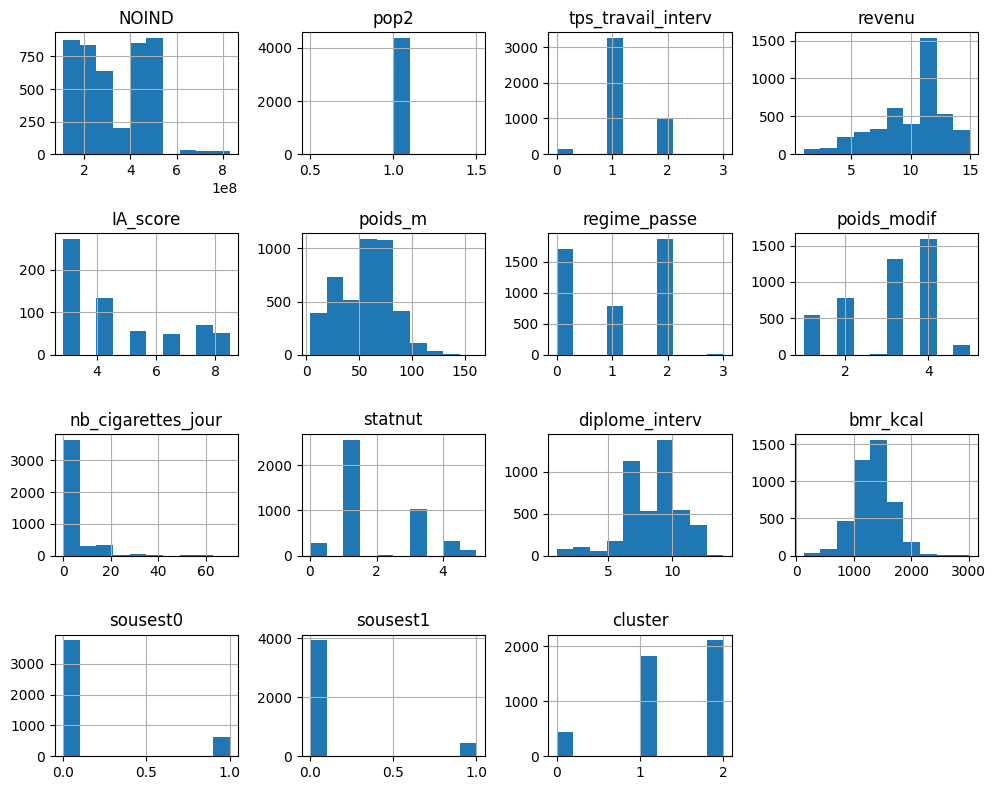

In [ ]:
df_descrip = pd.read_csv('Completed/description_indiv_completed.csv', header= 0)

# Sélectionnez les colonnes numériques
numeric_columns = df_descrip.select_dtypes(include='number').columns

df_descrip.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Tracez les histogrammes pour les variables numériques
# for col in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df_descrip[col].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Distribution de {col}')
#     plt.xlabel(col)
#     plt.ylabel('Fréquence')
#     plt.grid(False)
#     plt.show()

- **Corrélations entre Variables Numériques**: On peut utiliser une heatmap pour visualiser les corrélations entre les variables numériques.

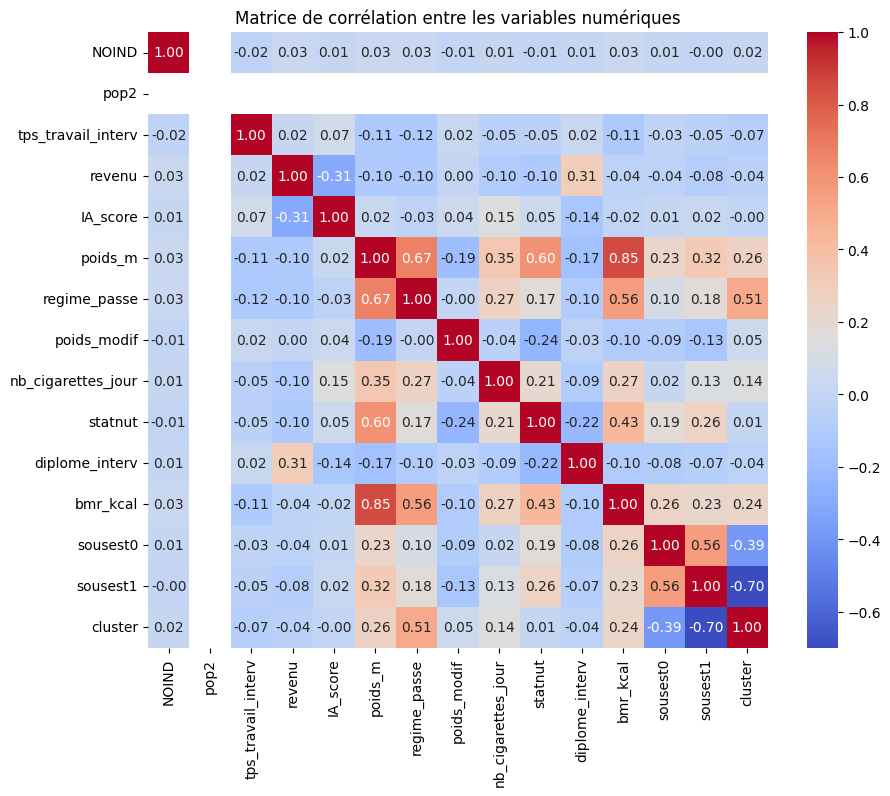

In [ ]:
import seaborn as sns
# Calculer la matrice de corrélation
correlation_matrix = df_descrip.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

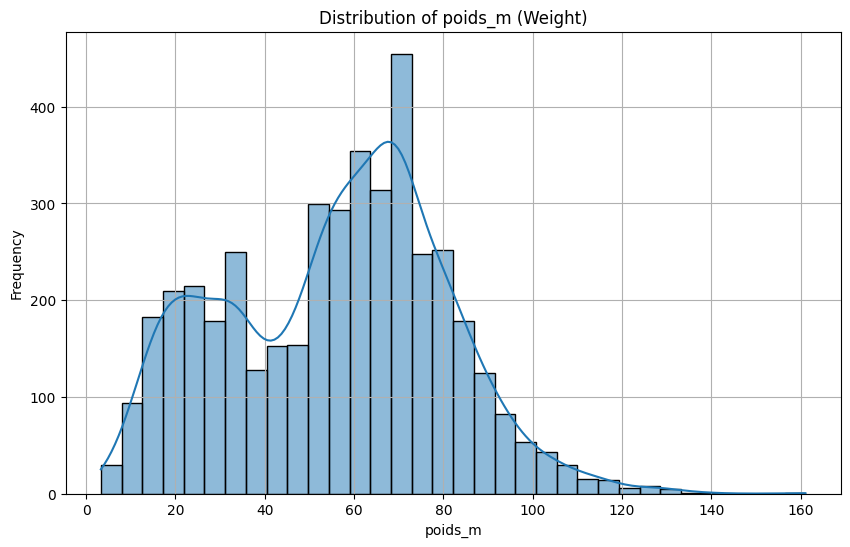

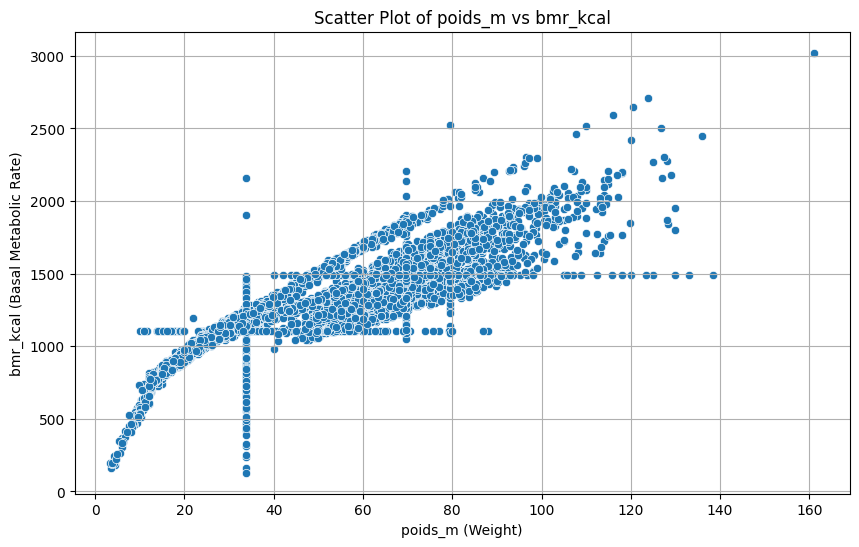

(           poids_m  nb_cigarettes_jour     bmr_kcal       revenu
 count  4372.000000         4372.000000  4372.000000  4372.000000
 mean     55.717690            2.897530  1337.115281    10.031565
 std      24.702334            6.902035   327.262625     3.025010
 min       3.300000            0.000000   128.737930     1.000000
 25%      33.843089            0.000000  1127.874550     8.000000
 50%      58.850000            0.000000  1341.991450    11.000000
 75%      72.300000            0.000000  1528.763100    12.000000
 max     161.100000           70.000000  3022.403800    15.000000,
            poids_m  bmr_kcal    revenu
 poids_m   1.000000  0.850099 -0.103583
 bmr_kcal  0.850099  1.000000 -0.037390
 revenu   -0.103583 -0.037390  1.000000)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Statistiques descriptives pour variables continues
df_descrip_desc_stats = df_descrip[['poids_m', 'nb_cigarettes_jour', 'bmr_kcal', 'revenu']].describe()

# Matrice de corrélation pour un sous-ensemble de variables continues
df_descrip_corr_matrix = df_descrip[['poids_m', 'bmr_kcal', 'revenu']].corr()

# Histogramme de la variable 'poids_m'
plt.figure(figsize=(10, 6))
sns.histplot(df_descrip['poids_m'].dropna(), kde=True)
plt.title('Distribution of poids_m (Weight)')
plt.xlabel('poids_m')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Nuage de points pour 'poids_m' vs 'bmr_kcal'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='poids_m', y='bmr_kcal', data=df_descrip)
plt.title('Scatter Plot of poids_m vs bmr_kcal')
plt.xlabel('poids_m (Weight)')
plt.ylabel('bmr_kcal (Basal Metabolic Rate)')
plt.grid(True)
plt.show()

# Sortie des statistiques descriptives et de la matrice de corrélation
df_descrip_desc_stats, df_descrip_corr_matrix


**Statistiques descriptives**:
Le tableau montre le nombre, la moyenne, l'écart type, le minimum, le 25e centile, la médiane (50e centile), le 75e centile et le maximum pour des variables telles que poids_m, nb_cigarettes_jour, bmr_kcal et les revenus. Ceux-ci permettent de comprendre la tendance centrale et la dispersion de ces variables.

**Matrice de corrélation**:
Une matrice de corrélation pour poids_m, bmr_kcal et revenu est fournie. Les valeurs vont de -1 à 1, indiquant la force et la direction de la relation linéaire entre chaque paire de variables. Par exemple, poids_m et bmr_kcal ont une corrélation positive élevée, ce qui suggère qu'à mesure que le poids augmente, le taux métabolique de base augmente également.

**Histogramme**:
Un histogramme pour la variable poids_m montre la distribution des poids au sein de l'ensemble de données. La forme de la distribution et toute asymétrie peuvent être évaluées visuellement ici.

**Nuage de points**:
Un nuage de points poids_m vs montre la relation entre ces deux variables. Une tendance positive peut être observée, suggérant qu'un poids plus élevé est généralement associé à des taux métaboliques de base plus élevés.


- **Comptage des valeurs manquantes**: Pour vérifier la présence de valeurs manquantes dans chaque variable.

In [ ]:
# Comptage des valeurs manquantes pour chaque variable
missing_values_count = df_descrip.isnull().sum()
print(missing_values_count)

NOIND                    0
pop2                     0
tps_travail_interv       0
revenu                   0
IA_score              3740
poids_m                  0
regime_passe             0
poids_modif              0
nb_cigarettes_jour       0
statnut                  0
diplome_interv           0
bmr_kcal                 0
sousest0                 0
sousest1                 0
cluster                  0
dtype: int64


### 4.2 TABLE HABITUDES_INDIV

- **Distribution des Variables Numériques**: Pour les variables numériques dans ce jeu de données, on peut examiner leurs distributions à l'aide d'histogrammes pour détecter les modes, l'asymétrie et les valeurs extrêmes.

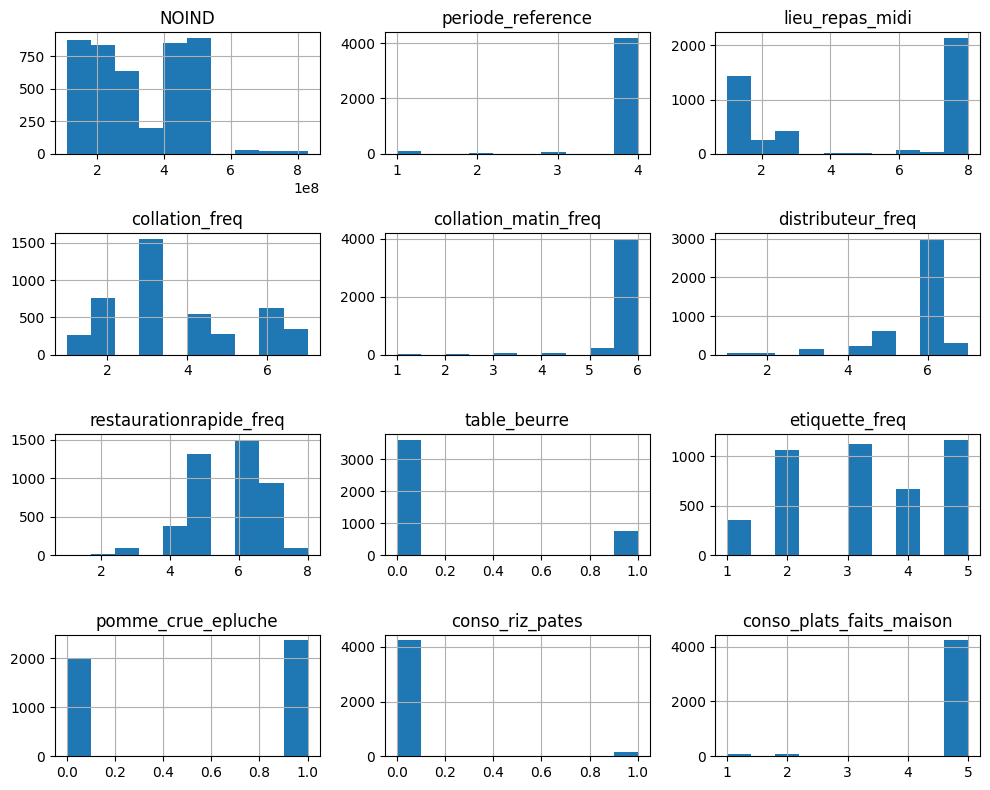

In [ ]:
df_habit = pd.read_csv('Completed/habitudes_indiv_completed.csv', header= 0)

# Sélectionnez les colonnes numériques
numeric_columns = df_habit.select_dtypes(include='number').columns

df_habit.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Tracez les histogrammes pour les variables numériques
# for col in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df_habit[col].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.title(f'Distribution de {col}')
#     plt.xlabel(col)
#     plt.ylabel('Fréquence')
#     plt.grid(False)
#     plt.show()

- **Corrélations entre Variables Numériques**: On peut utiliser une heatmap pour visualiser les corrélations entre les variables numériques.

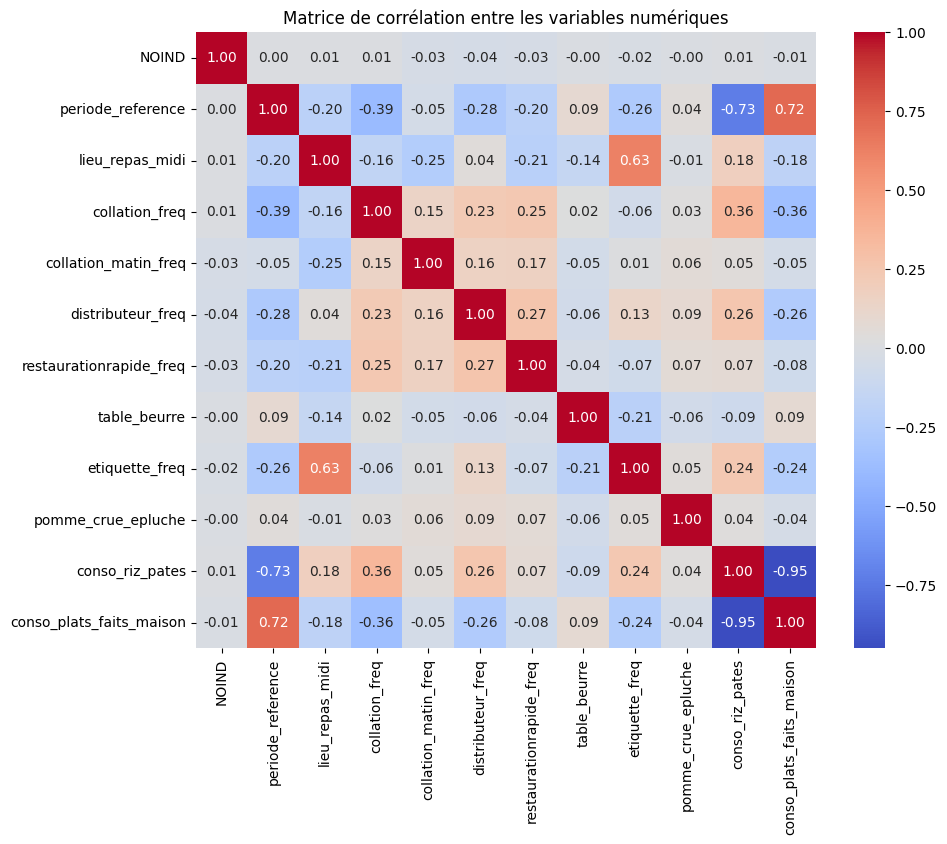

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df_habit.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

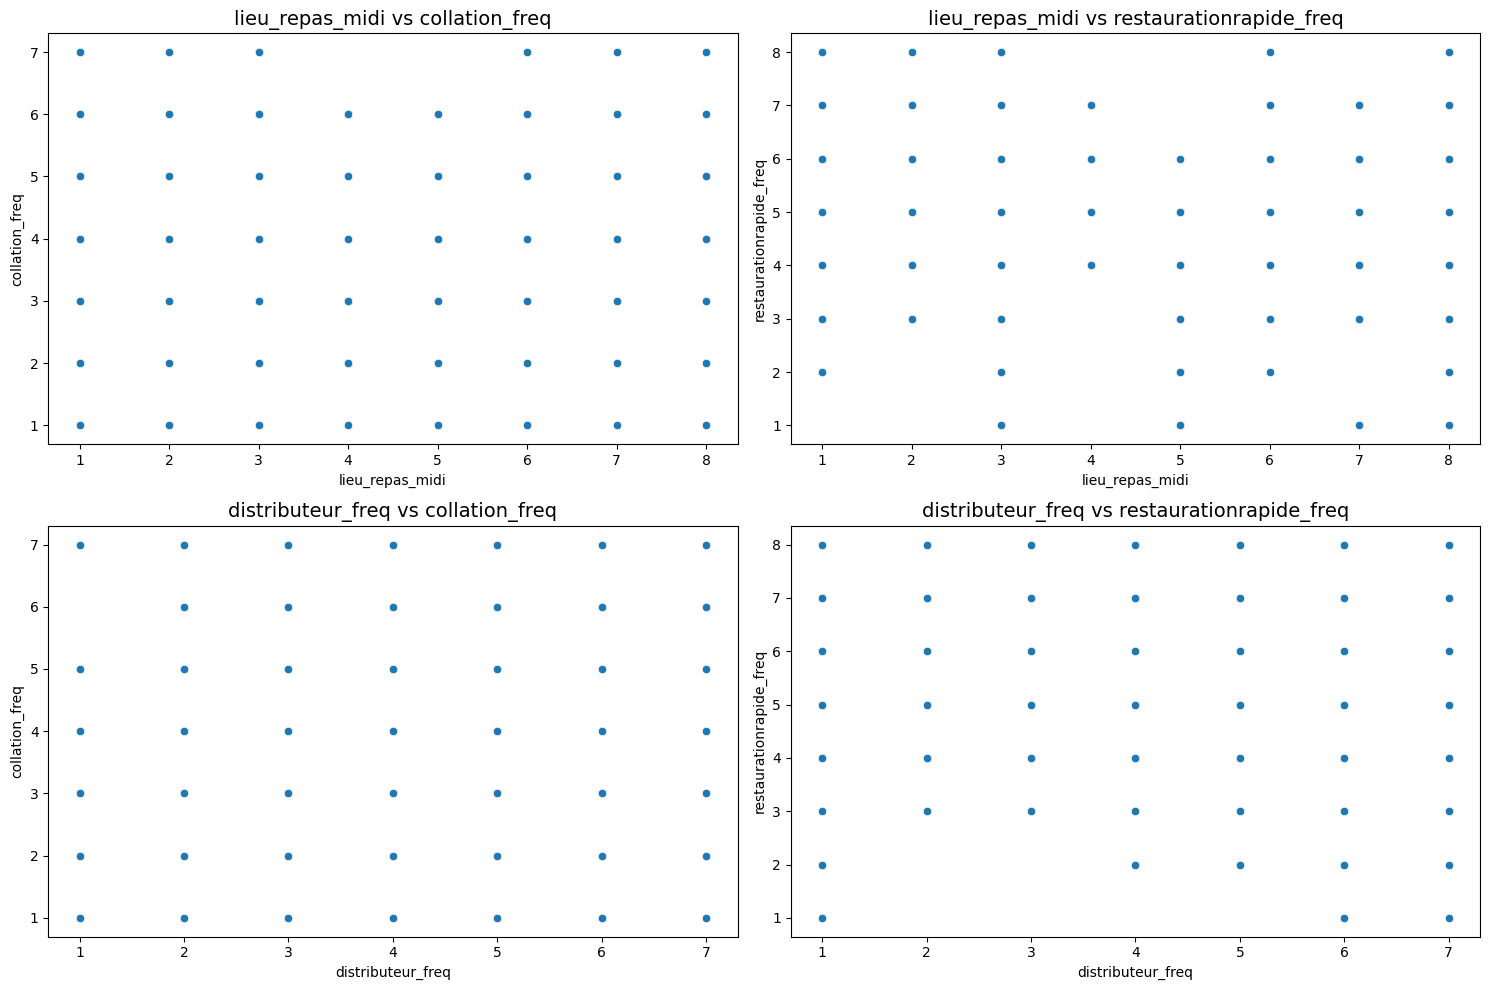

,NOIND,periode_reference,lieu_repas_midi,collation_freq,collation_matin_freq,distributeur_freq,restaurationrapide_freq,table_beurre,etiquette_freq,pomme_crue_epluche,conso_riz_pates,conso_plats_faits_maison
count,4.372000e+03,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,3.273214e+08,3.902562,4.806496,3.708143,5.835316,5.634035,5.681610,0.176578,3.277905,0.540485,0.032708,4.884492
std,1.502493e+08,0.486018,3.248508,1.687126,0.654678,0.983094,1.092266,0.381355,1.308276,0.498415,0.177892,0.622661
min,1.101001e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.158761e+08,4.000000,1.000000,3.000000,6.000000,6.000000,5.000000,0.000000,2.000000,0.000000,0.000000,5.000000
50%,3.212004e+08,4.000000,6.000000,3.000000,6.000000,6.000000,6.000000,0.000000,3.000000,1.000000,0.000000,5.000000
75%,4.268027e+08,4.000000,8.000000,5.000000,6.000000,6.000000,6.000000,0.000000,5.000000,1.000000,0.000000,5.000000
max,8.292078e+08,4.000000,8.000000,7.000000,6.000000,7.000000,8.000000,1.000000,5.000000,1.000000,1.000000,5.000000


In [ ]:
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Statistiques descriptives
df_habit_desc_stats = df_habit.describe()

# Sélection de paires de colonnes pour une analyse bidimensionnelle
pairs_to_analyze_2d = [('lieu_repas_midi', 'collation_freq'), 
                       ('lieu_repas_midi', 'restaurationrapide_freq'),
                       ('distributeur_freq', 'collation_freq'),
                       ('distributeur_freq', 'restaurationrapide_freq')]

# Créer des nuages de points pour ces paires
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pairs_to_analyze_2d):
    sns.scatterplot(x=df_habit[x_col], y=df_habit[y_col], ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=14)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

plt.tight_layout()
plt.show()

# Sortir
df_habit_desc_stats



Les nuages de points ci-dessus illustrent les relations entre les paires de variables:

**lieu_repas_midi vs collation_freq** : Ce graphique montre comment l'emplacement des repas de midi est lié à la fréquence des collations. Les différents emplacements pour les repas de midi sont représentés par des valeurs distinctes sur l'axe des x.

**lieu_repas_midi vs restaurationrapide_freq** : Ceci indique la relation entre le lieu des repas de midi et la fréquence des repas dans les fast-foods.

**distributeur_freq vs collation_freq**: Ceci décrit la relation entre la fréquence d'utilisation des distributeurs alimentaires/distributeurs automatiques et la fréquence de grignotage.

**distributeur_freq vs restaurationrapide_freq** : Cela montre la relation entre la fréquence d'utilisation des distributeurs alimentaires/distributeurs automatiques et la fréquence de consommation dans les restaurants fast-food.

- **Comptage des valeurs manquantes**: Pour vérifier la présence de valeurs manquantes dans chaque variable.

In [ ]:
# Comptage des valeurs manquantes pour chaque variable
missing_values_count = df_habit.isnull().sum()
print(missing_values_count)

POPULATION                  0
NOIND                       0
periode_reference           0
lieu_repas_midi             0
collation_freq              0
collation_matin_freq        0
distributeur_freq           0
restaurationrapide_freq     0
table_beurre                0
etiquette_freq              0
pomme_crue_epluche          0
conso_riz_pates             0
conso_plats_faits_maison    0
dtype: int64


### 4.3 TABLE ACTPHYS_SEDENT


- **Distribution des Variables Numériques**: Pour les variables numériques dans ce jeu de données, on peut examiner leurs distributions à l'aide d'histogrammes pour détecter les modes, l'asymétrie et les valeurs extrêmes.

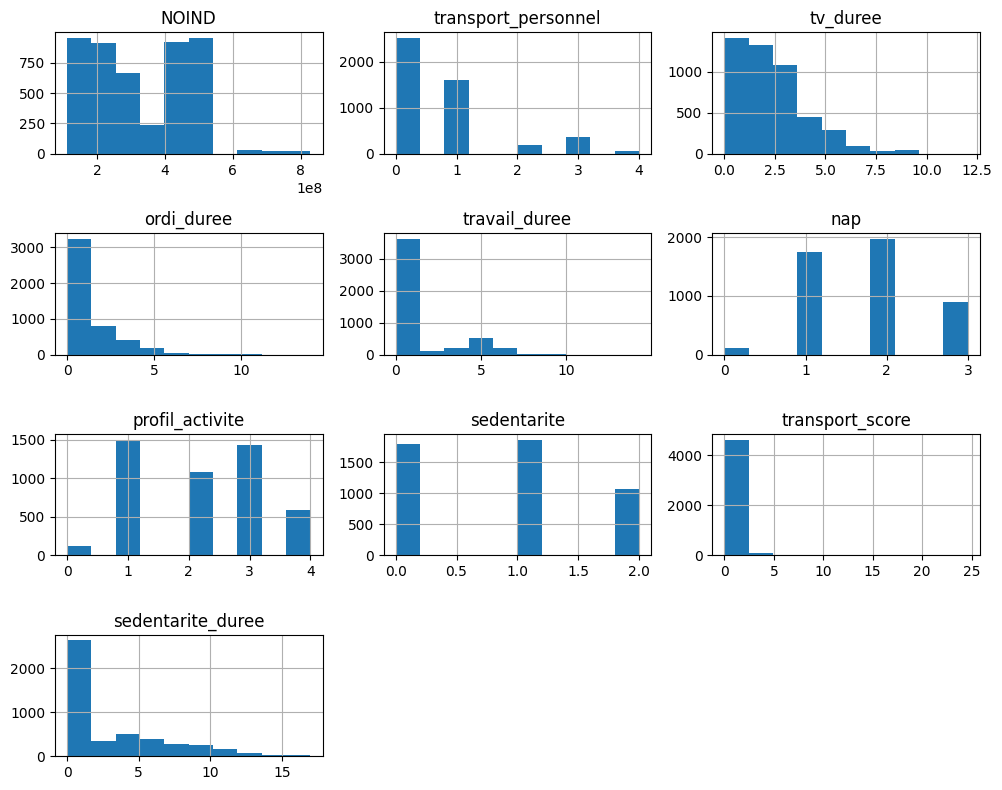

In [ ]:
# Chargez les données
df_act = pd.read_csv('Completed/actphys_sedent_completed.csv', header=0)

# Sélectionnez les colonnes numériques
numeric_columns = df_act.select_dtypes(include='number').columns

df_act.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Tracez les histogrammes pour les variables numériques
# for col in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df_act[col].hist(bins=20, color='skyblue', edgecolor='black')
#     plt.tight_layout()
#     plt.title(f'Distribution de {col}')
#     plt.xlabel(col)
#     plt.ylabel('Fréquence')
#     plt.grid(False)
#     plt.show()

- **Équilibre des Classes (le cas échéant)**: Car on a des variables catégoriques, on peut examiner l'équilibre entre les différentes classes.

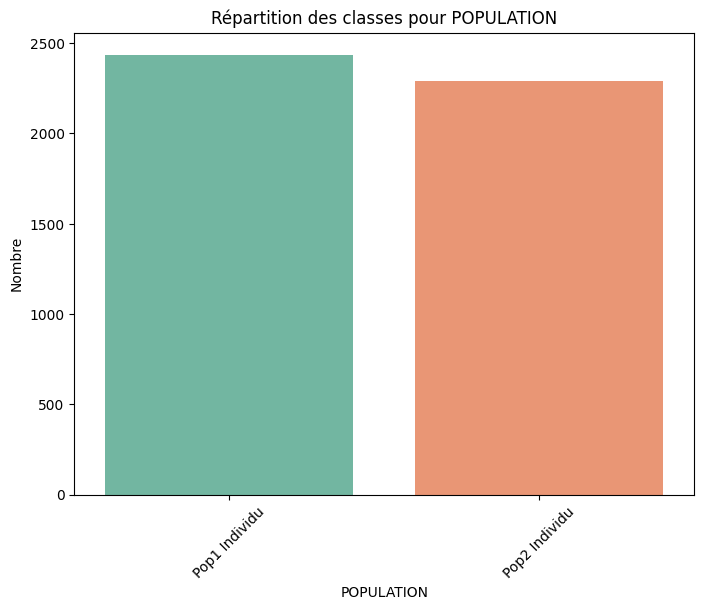

In [ ]:
# Sélectionnez les colonnes catégoriques
categorical_columns = df_act.select_dtypes(include='object').columns

# Affichez la répartition des classes pour les variables catégoriques
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_act, x=col, palette='Set2')
    plt.title(f'Répartition des classes pour {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.xticks(rotation=45)
    plt.show()

- **Corrélations entre Variables Numériques**: On peut utiliser une heatmap pour visualiser les corrélations entre les variables numériques.

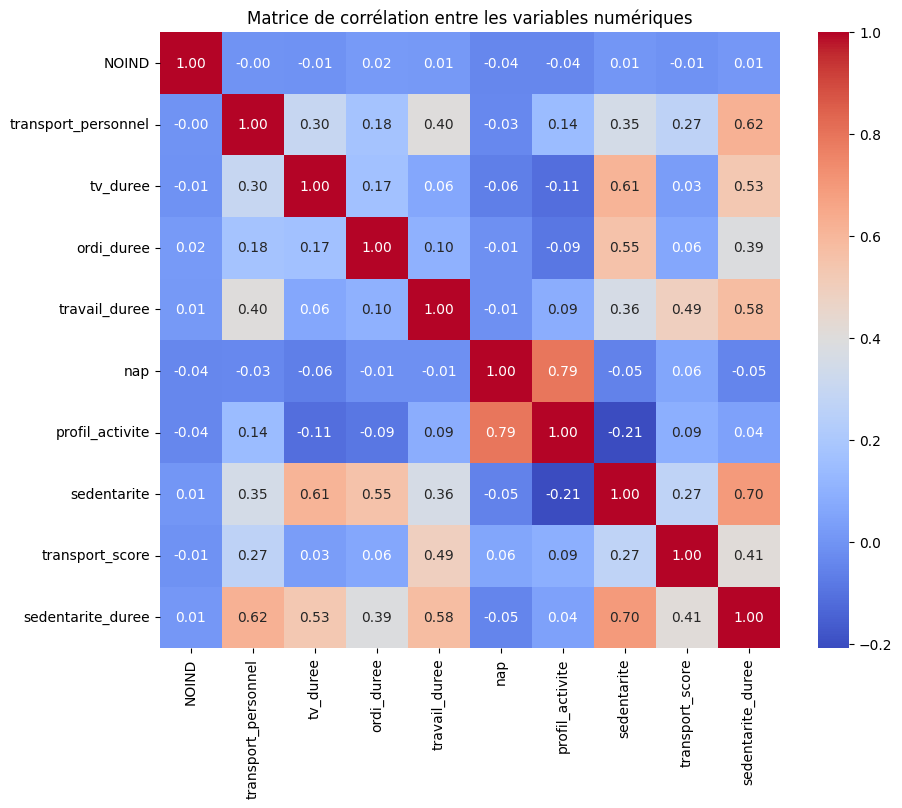

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df_act.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


- **Relations entre Variables Numériques**: On représent ici graphiquement la relation entre deux variables numériques avec des scatter plots. Les résultats sont conformes à la réalité : utilisation des transports plus fréquents réduisent inévitablement le temps passé devant la télévision.

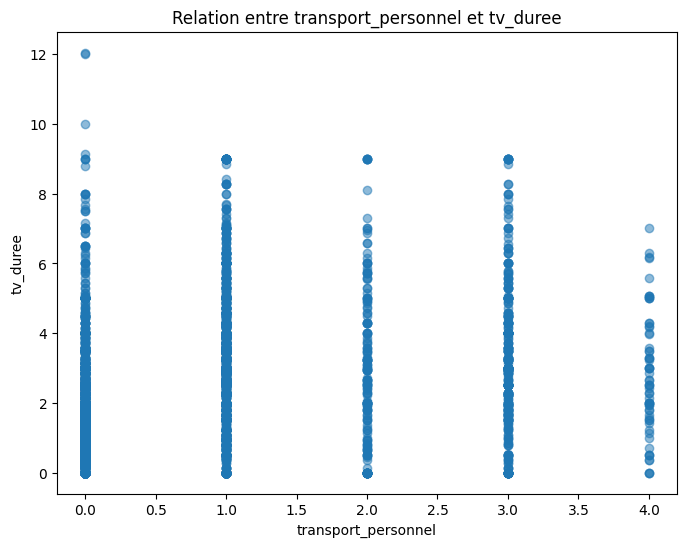

In [ ]:
# Choisissez deux variables numériques pour créer un scatter plot
variable1 = 'transport_personnel'
variable2 = 'tv_duree'

plt.figure(figsize=(8, 6))
plt.scatter(df_act[variable1], df_actphys_sedent_selected[variable2], alpha=0.5)
plt.title(f'Relation entre {variable1} et {variable2}')
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()


- **Exploration des Variables Catégoriques et Numériques**: On peut utiliser des boxplots pour visualiser la répartition des variables numériques en fonction des catégories.

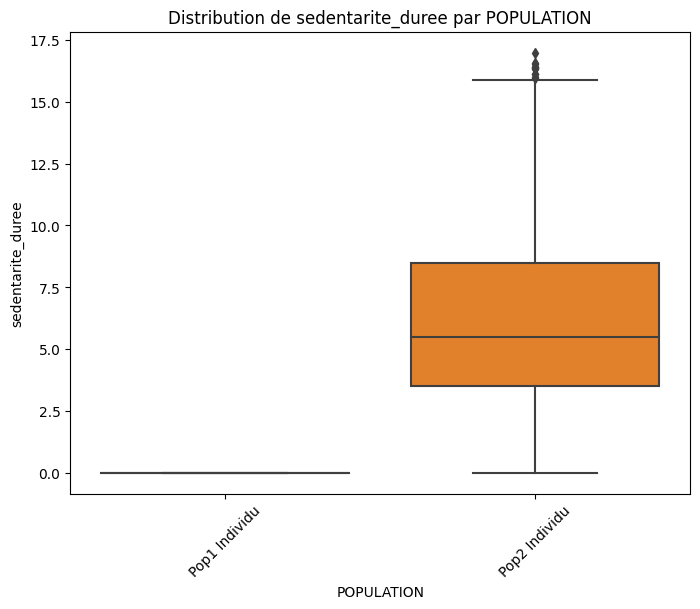

In [ ]:
# une variable catégorique et une variable numérique pour le boxplot
variable_cat = 'POPULATION'
variable_num = 'sedentarite_duree'

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_act, x=variable_cat, y=variable_num)
plt.title(f'Distribution de {variable_num} par {variable_cat}')
plt.xlabel(variable_cat)
plt.ylabel(variable_num)
plt.xticks(rotation=45)
plt.show()

### 4.4 TABLE Fréquentiel alimentaire (FPQ)

- **Histogrammes et Diagrammes de densité**: Visualisons la distribution des variables à l'aide d'histogrammes pour détecter les modes, l'asymétrie et les valeurs extrêmes potentielles.

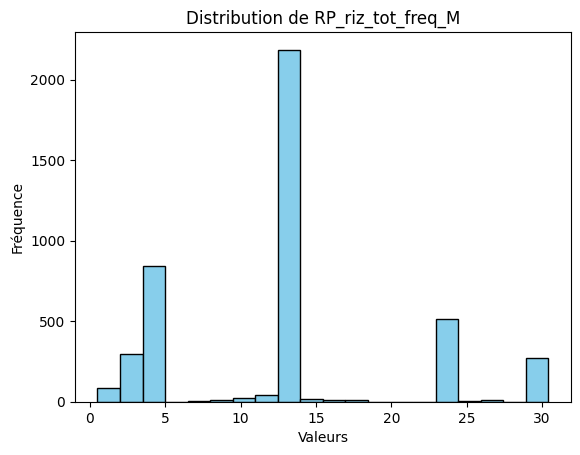

In [ ]:
df_fpq = pd.read_csv('Completed/fpq_completed.csv', header= 0)

# Exemple avec la variable 'RP_riz_tot_freq_M'
plt.hist(df_fpq['RP_riz_tot_freq_M'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution de RP_riz_tot_freq_M')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()
 

- **Boîtes à moustaches (Boxplots)**: Les boxplots permettent de visualiser la répartition des valeurs, les valeurs extrêmes et les différences entre les quartiles.

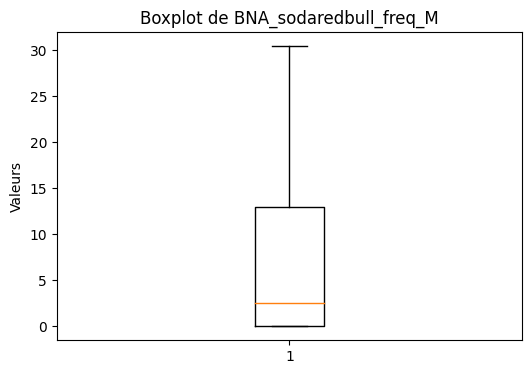

In [ ]:
# Exemple avec la variable 'BNA_sodaredbull_freq_M'
plt.figure(figsize=(6, 4))
plt.boxplot(df_fpq['BNA_sodaredbull_freq_M'].dropna())
plt.title('Boxplot de BNA_sodaredbull_freq_M')
plt.ylabel('Valeurs')
plt.show()

- **Matrice de corrélation**: On peut ensuite visualiser les corrélations entre les variables quantitatives.

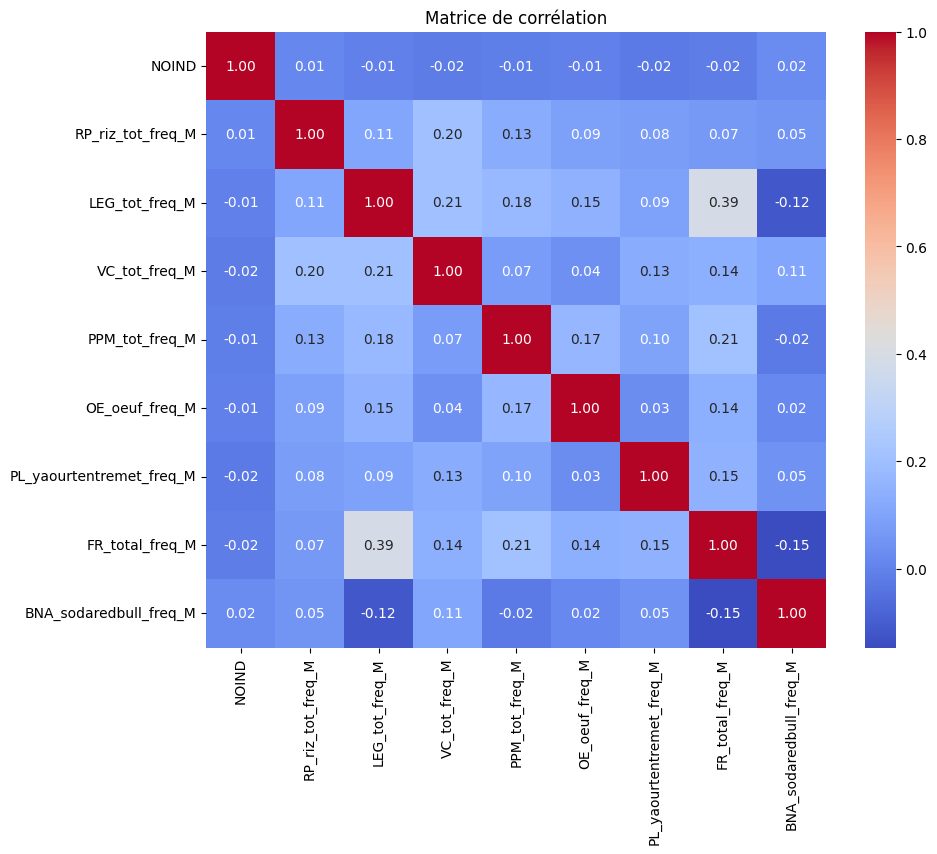

In [ ]:
import seaborn as sns

# Calcul de la matrice de corrélation
correlation_matrix = df_fpq.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


- **Nuages de points (Scatter plots)**: On explore ici la relation entre deux variables continues qui ont une fort corrélations entre eux. On constate que la corrélation n'est pas aussi évidente qu'on pourrait le penser.

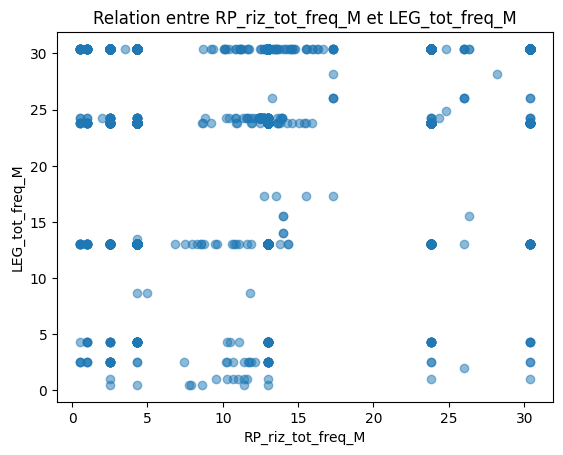

In [ ]:
# Exemple avec 'RP_riz_tot_freq_M' et 'LEG_tot_freq_M'
plt.scatter(df_fpq['RP_riz_tot_freq_M'], df_fpq['LEG_tot_freq_M'], alpha=0.5)
plt.title('Relation entre RP_riz_tot_freq_M et LEG_tot_freq_M')
plt.xlabel('RP_riz_tot_freq_M')
plt.ylabel('LEG_tot_freq_M')
plt.show()

- **Boxplots par groupes**: On peut aussi comparer la distribution d'une variable continue entre différentes catégories.

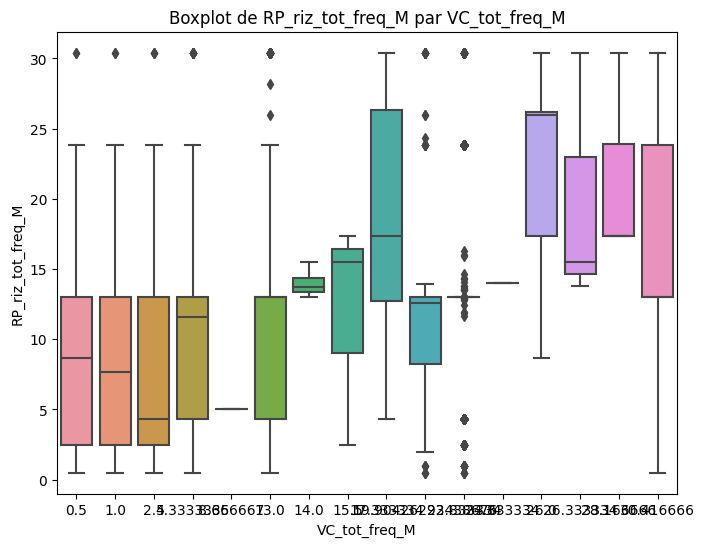

In [ ]:
# Exemple avec 'RP_riz_tot_freq_M' par groupe de 'VC_tot_freq_M'
plt.figure(figsize=(8, 6))
sns.boxplot(x='VC_tot_freq_M', y='RP_riz_tot_freq_M', data=df_fpq)
plt.title('Boxplot de RP_riz_tot_freq_M par VC_tot_freq_M')
plt.xlabel('VC_tot_freq_M')
plt.ylabel('RP_riz_tot_freq_M')
plt.show()

## 5  Analyse exploratoire

### 5.1 Identification de liens entre variables

Y a-t-il une corrélation entre les caractéristiques socio-démographiques de l'individu et ses habitudes alimentaires décrites dans les tables de données individuelles ?

Tout d’abord, les ensembles de données sont intégrés.

In [ ]:
import pandas as pd

# Charger les ensembles de données
description_indiv_df = pd.read_csv('Completed/description_indiv_completed.csv')
habitudes_indiv_df = pd.read_csv('Completed/habitudes_indiv_completed.csv')

# Afficher les premières lignes de chaque ensemble de données pour l'exploration initiale
description_head = description_indiv_df.head()
habitudes_head = habitudes_indiv_df.head()

description_head, habitudes_head

# Fusion des ensembles de données sur la colonne 'NOIND'
merged_df = pd.merge(description_indiv_df, habitudes_indiv_df, on='NOIND')

# Affichage des premières lignes de l'ensemble de données fusionné pour l'exploration
merged_head = merged_df.head()
merged_head.shape, merged_head


((5, 27),
        NOIND  pop2  tps_travail_interv  revenu  IA_score  poids_m  \
 0  110100101     1                 0.0      12       NaN     51.6   
 1  110100701     1                 2.0      11       NaN     65.1   
 2  110100801     1                 1.0      11       NaN     78.6   
 3  110101201     1                 1.0      11       NaN     81.9   
 4  110101401     1                 1.0       6       NaN     51.8   
 
    regime_passe  poids_modif  nb_cigarettes_jour  statnut  ...  \
 0           2.0          4.0                 0.0      0.0  ...   
 1           2.0          2.0                 0.0      1.0  ...   
 2           2.0          4.0                15.0      3.0  ...   
 3           2.0          4.0                 0.0      3.0  ...   
 4           2.0          4.0                 0.0      1.0  ...   
 
    lieu_repas_midi  collation_freq  collation_matin_freq  distributeur_freq  \
 0              2.0             1.0                   6.0                6.0   
 1  

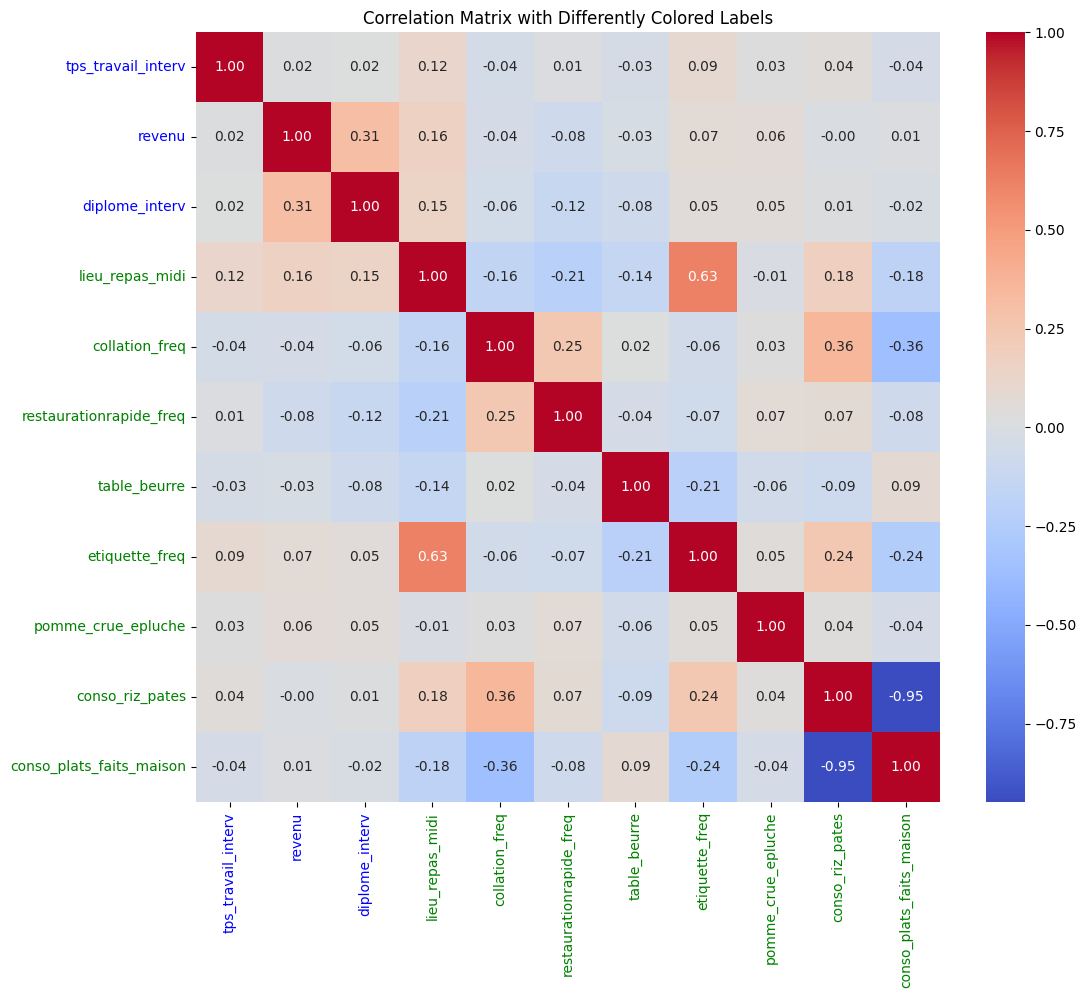

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection de caractéristiques socio-démographiques dans DESCRIPTION_INDIV
social_demographic_features = ['tps_travail_interv', 'revenu', 'diplome_interv']

# Combinaison des caractéristiques socio-démographiques avec les caractéristiques des habitudes alimentaires de HABITUDES_INDIV
combined_features = social_demographic_features + ['lieu_repas_midi', 'collation_freq', 'restaurationrapide_freq', 'table_beurre', 'etiquette_freq', 'pomme_crue_epluche', 'conso_riz_pates', 'conso_plats_faits_maison']

# Création d'un sous-ensemble de données avec les fonctionnalités combinées
combined_subset_df = merged_df[combined_features]

# Calcul de la matrice de corrélation pour les fonctionnalités combinées
combined_correlation_matrix = combined_subset_df.corr()

# Fonction pour appliquer différentes couleurs aux étiquettes dans la carte thermique
def heatmap_label_coloring(val):
    if val in social_demographic_features:
        return 'blue'
    elif val in ['lieu_repas_midi', 'collation_freq', 'restaurationrapide_freq', 'table_beurre', 'etiquette_freq', 'pomme_crue_epluche', 'conso_riz_pates', 'conso_plats_faits_maison']:
        return 'green'
    else:
        return 'black'

# Création d'une carte thermique avec des étiquettes de couleurs différentes
plt.figure(figsize=(12, 10))
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Appliquer différentes couleurs aux étiquettes
for label in plt.gca().get_xticklabels():
    label.set_color(heatmap_label_coloring(label.get_text()))
for label in plt.gca().get_yticklabels():
    label.set_color(heatmap_label_coloring(label.get_text()))

plt.title('Correlation Matrix with Differently Colored Labels')
plt.show()


Dans cette heatmap, on peut voir la corrélation entre les caractéristiques sociodémographiques des individus (telles que tps_travail_interv, revenu, diplome_interv) et les habitudes alimentaires (telles que lieu_repas_midi, collation_freq, restaurationrapide_freq, etc.).

Un coefficient de corrélation proche de 1 ou -1 indique une forte corrélation, et un coefficient de corrélation proche de 0 indique une corrélation faible ou inexistante. Par exemple, si une certaine caractéristique sociodémographique présente un coefficient de corrélation élevé avec une certaine habitude alimentaire, cela peut signifier qu’il existe une association significative entre les deux variables. Cette association peut être causée directement ou indirectement par d'autres facteurs (tels que le mode de vie, le contexte culturel, etc.).

Grâce à l’analyse des cartes thermiques, nous pouvons constater que les personnes ayant un niveau de vie plus élevé ne déjeunent généralement pas à la maison et que la corrélation est supérieure à 0,1. La corrélation des autres balises est plus faible, inférieure à 0,1, nous pensons donc qu'elles ne sont pas pertinentes.

### 5.2 Possibilité d'expliquer une variable en fonction d'autres

Est-il possible d'expliquer les habitudes alimentaires décrites dans la table HABITUDES_INDIV en fonction des caractéristiques anthropométriques ou du statut de santé de la table DESCRIPTION_INDIV ?

Nous continuerons à utiliser l'ensemble de données intégré dans **5.1** pour l'analyse des données.

Examiner les corrélations entre les caractéristiques de mesure corporelle (poids_m) et les indicateurs d'état de santé (nb_cigarettes_jour) et les habitudes alimentaires (restaurationrapide_freq).

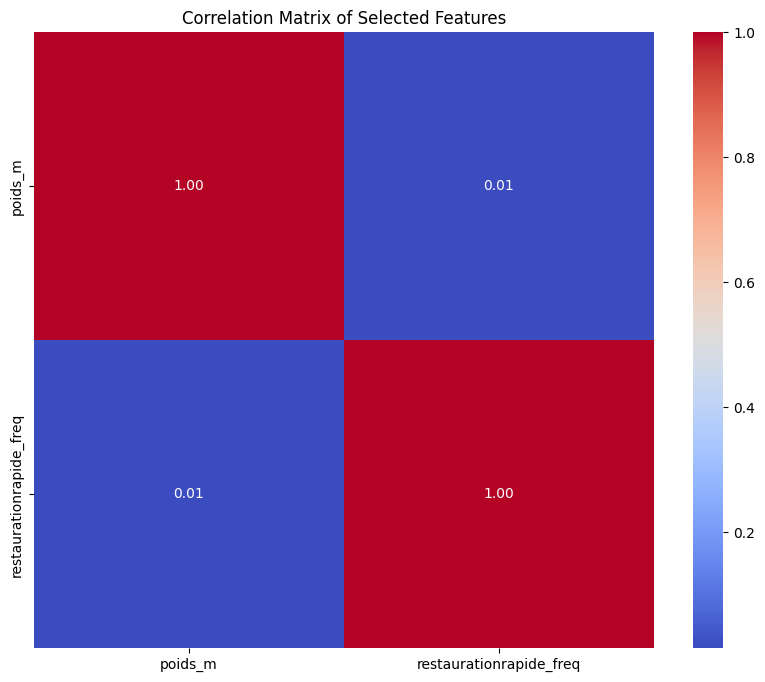

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des fonctionnalités clés pour l'analyse de corrélation
key_features = ['poids_m', 'restaurationrapide_freq']

# Création d'un sous-ensemble de données avec les fonctionnalités sélectionnées
subset_df = merged_df[key_features]

# Calcul de la matrice de corrélation
correlation_matrix = subset_df.corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()


À partir de la matrice de corrélation, nous pouvons observer la corrélation entre les caractéristiques sélectionnées. Le coefficient de corrélation varie de -1 à 1, les valeurs proches de 1 ou -1 indiquant une forte corrélation, tandis que les valeurs proches de 0 indiquent une corrélation nulle ou très faible.

Avec cette analyse, nous pouvons commencer à explorer comment expliquer la relation entre les caractéristiques des mensurations corporelles, l’état de santé et les habitudes alimentaires. Il n'y a pas de corrélation positive significative entre le poids (poids_m) et la fréquence de consommation de restauration rapide (restaurationrapide_freq), ce qui peut indiquer que le poids a peu à voir avec la fréquence de consommation de restauration rapide.

### 5.3 Prédiction d'un événement

Peut-on prédire le niveau d'activité physique ou de sédentarité d'un individu à partir des habitudes et des caractéristiques socio-démographiques ?

En combinant ces variables représentatives des caractéristiques socio-démographiques, des habitudes alimentaires et des habitudes d'activité physique/sédentarité, il est possible de construire des modèles prédictifs pour estimer le niveau d'activité physique ou de sédentarité d'un individu. Les modèles pourraient utiliser des techniques d'apprentissage statistique ou d'analyse prédictive pour établir des relations entre ces variables et prédire les niveaux d'activité physique ou de sédentarité.

In [ ]:
df_descrip = pd.read_csv('Completed/description_indiv_completed.csv')
df_habit = pd.read_csv('Completed/habitudes_indiv_completed.csv')
df_act = pd.read_csv('Completed/actphys_sedent_completed.csv')
df_act = df_act[df_act['POPULATION'] == 'Pop2 Individu']

# Fusion des DataFrames sur la colonne 'NOIND' (identifiant individuel)
merged_data = pd.merge(df_descrip, df_habit, on='NOIND')
merged_data = pd.merge(merged_data, df_act, on='NOIND')

# Sélection des variables pertinentes pour la prédiction
selected_variables = ['diplome_interv', 'revenu', 'poids_m', 'tv_duree', 'ordi_duree',
                        'nap', 'sedentarite', 'profil_activite']

# Création d'un nouveau DataFrame avec les variables sélectionnées
final_data = merged_data[selected_variables]


On commence la prédiction par une analyse descriptive avec la visualisation.

       diplome_interv       revenu      poids_m     tv_duree   ordi_duree  \
count     2288.000000  2288.000000  2288.000000  2288.000000  2288.000000   
mean         8.376748     9.574738    72.688235     3.005056     1.528073   
std          2.334439     3.207257    15.320870     1.955236     1.630945   
min          1.000000     1.000000    33.843089     0.000000     0.000000   
25%          7.000000     7.000000    62.200000     1.642860     0.357140   
50%          8.000000    10.000000    70.000000     2.928570     1.000000   
75%         10.000000    12.000000    81.000000     4.000000     2.250825   
max         14.000000    15.000000   161.100000     9.000000     9.000000   

               nap  sedentarite  profil_activite  
count  2288.000000  2288.000000      2288.000000  
mean      1.672203     1.180944         2.308566  
std       0.723807     0.719243         1.122211  
min       0.000000     0.000000         0.000000  
25%       1.000000     1.000000         1.000000  


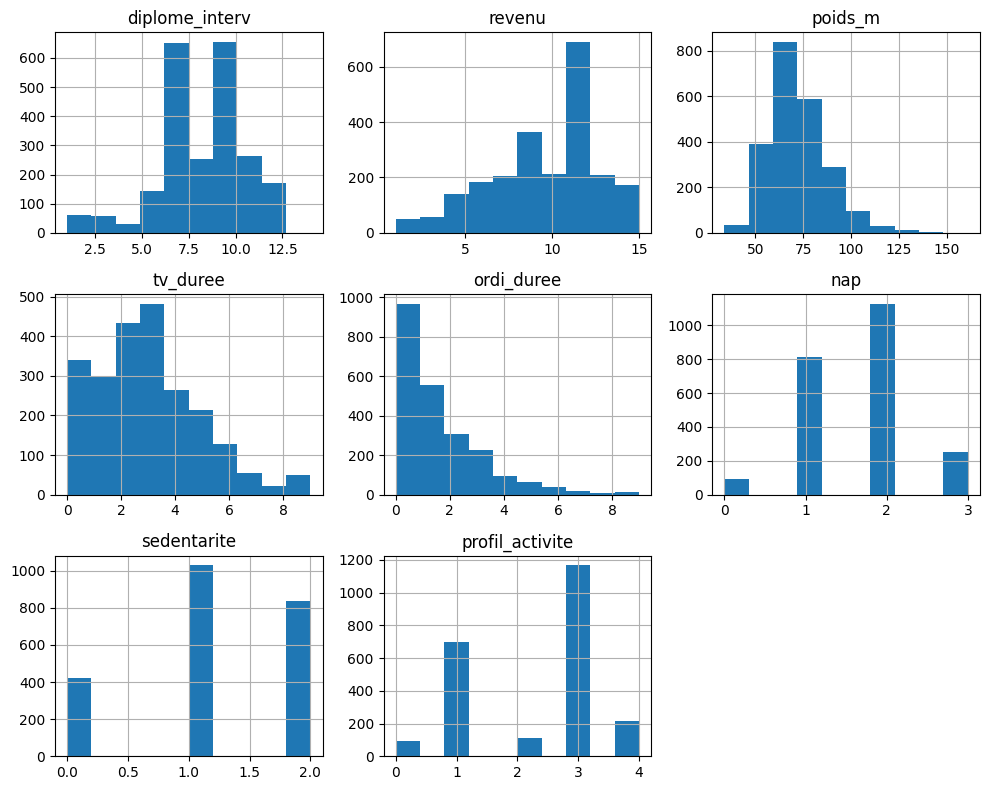

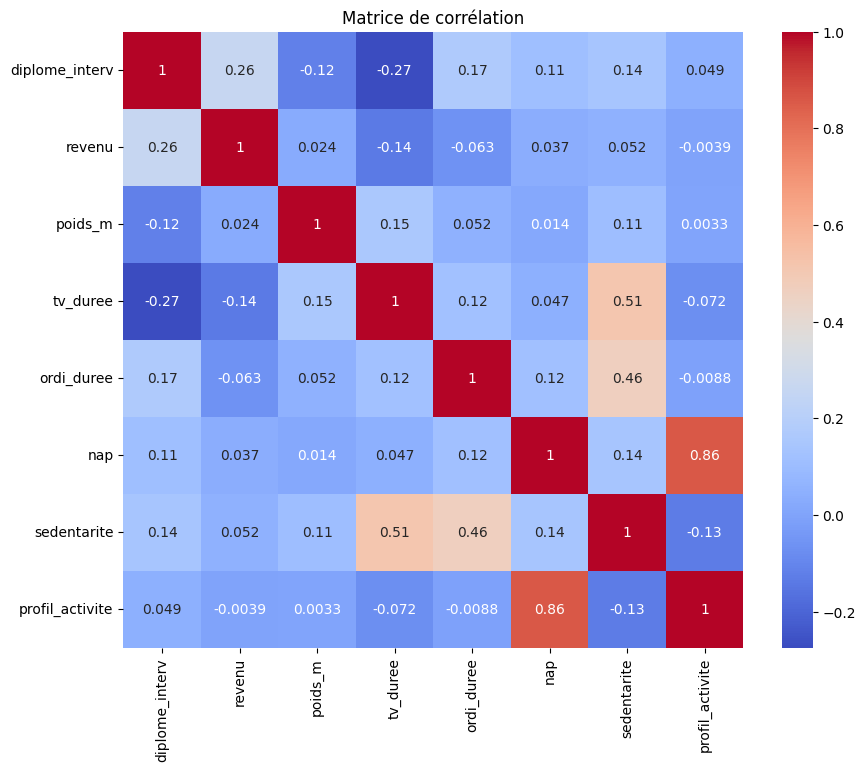

In [ ]:
# Analyse descriptive
print(final_data.describe())

# Visualisation des données
import matplotlib.pyplot as plt

# Histogrammes des variables
final_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Matrice de corrélation
correlation_matrix = final_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


Les plus évidentes sont le temps passé à regarder la télévision et à utiliser des ordinateurs, avec une forte corrélation avec les niveaux de sédentarité, le profil d'activité avec les niveaux d'activité physique, et le niveau d'éducation avec le revenu, mais quels sont les résultats prévus lorsque toutes les corrélations modérément fortes et les corrélations virtuellement nulles sont mises ensemble ?

Mais avant de pouvoir faire cette prédiction, nous devons réduire l'échelle de ces variables pour faciliter les analyses ultérieures. Nous procédons ici à une analyse en composantes principales (ACP).

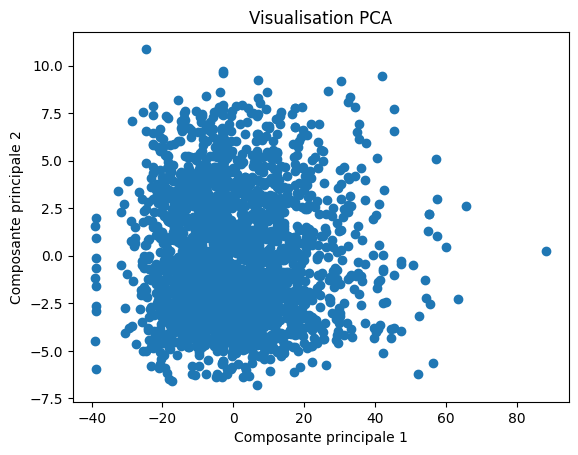

In [ ]:
from sklearn.decomposition import PCA

# Utilisation de PCA pour réduire la dimensionnalité
pca = PCA(n_components=2)
pca_result = pca.fit_transform(final_data)

# Visualisation PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Visualisation PCA')
plt.show()

On utilise ensuite le regroupement k-means pour identifier les groupes naturels dans nos données.

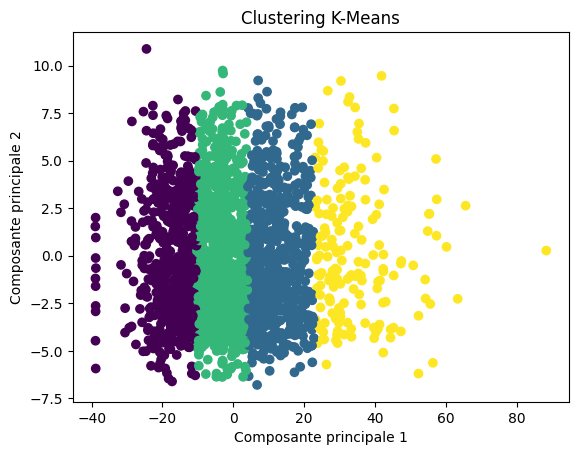

In [ ]:
from sklearn.cluster import KMeans

# Clustering avec K-Means (par exemple, avec 4 clusters)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(final_data)

# Visualisation des clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clustering K-Means')
plt.show()


Il est également évident que les résultats de la classification sont plus satisfaisants et qu'il n'y a pas d'entrelacement des données.

Lorsque les étapes d'exploration des données, de réduction de la dimensionnalité, de visualisation et de regroupement sont achevées pour mettre en œuvre le code de prédiction, on utilise les données traitées et comprises pour entraîner et évaluer le modèle.

Ici, on a utilisé des modèles de **régression linéaire** et d'**arbres aléatoires** pour la prédiction et on a donné **la précision** et **l'erreur quadratique moyenne** pour évaluer les résultats.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Séparation des données en variables explicatives (X) et variable cible (y)
X = final_data.drop(['nap', 'sedentarite'], axis=1)  # Variables explicatives sans les cibles
# X = pca_result 
y = final_data['sedentarite']  # Variable cible

# Division des données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Précision du modèle de régression linéaire: {accuracy}")
mse = mean_squared_error(y_test, predictions)
print(f"MSE : {mse}")

# Modèle de forêts aléatoires
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
rf_predictions = rf_model.predict(X_test)

print(f"Précision du modèle de forêts aléatoires : {rf_accuracy}")
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Précision du modèle de régression linéaire: 0.5138696527052121
MSE : 0.2545832026040075
Précision du modèle de forêts aléatoires : 0.7460829188362523
Random Forest MSE: 0.13297467248908298


Nous pouvons noter que les résultats de la prédiction face à tant de variables sont assez satisfaisants. C'est pourquoi nous avons décidé de ne pas utiliser les données réduites en dimensionnalité de la PCA, mais les données brutes pour une optimisation plus poussée du modèle.

La validation croisée répétée (repeated cross-validation) est une technique qui consiste à répéter plusieurs fois la procédure de validation croisée pour obtenir des estimations plus robustes des performances du modèle. Pour ce faire, on utilise la classe RepeatedKFold de scikit-learn lors de la définition du paramètre cv dans GridSearchCV. Le but est de trouver le meilleur ensemble d'hyperparamètres pour notre modèle afin de comparer les résultats. 

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir les hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle RandomForestRegressor
rf_model = RandomForestRegressor()

# Utiliser la validation croisée répétée avec GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # ajustez n_splits et n_repeats selon vos besoins
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_

# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_rf_model = grid_search.best_estimator_

# Faire des prédictions et évaluer le modèle
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print(f"Meilleur modèle Random Forest R² : {best_rf_r2}")
print(f"Meilleur modèle Random Forest MSE : {best_rf_mse}")
print(f"Meilleurs hyperparamètres du modèle Random Forest : {best_params}")


Meilleur modèle Random Forest R² : 0.7527670285215973
Meilleur modèle Random Forest MSE : 0.12947424907441452
Meilleurs hyperparamètres du modèle Random Forest : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


Interprétation des résultats :

1. **Coefficient de détermination (R²) :** R² mesure la proportion de la variance de la sédentairté dépendante qui est expliquée par le modèle. Une valeur de 0.7527 indique que le modèle explique environ 75,27% de la variance de la sédentairté. C'est une performance relativement élevée et suggère que le modèle a une capacité significative à expliquer la variabilité des données.

2. **Erreur Quadratique Moyenne (MSE) :** MSE mesure la moyenne des carrés des erreurs entre les prédictions du modèle et les valeurs réelles. Une valeur de 0.1294 indique une MSE relativement faible, ce qui suggère que les prédictions du modèle sont en général proches des valeurs réelles.

3. **Meilleurs Hyperparamètres :** Les hyperparamètres sélectionnés par la recherche par grille pour obtenir ce modèle performant sont spécifiés ci-dessus. Ces hyperparamètres peuvent être utilisés pour créer un modèle qui, selon les métriques que nous avons choisit, offre une bonne performance sur l'ensemble de test.

Globalement, ces résultats suggèrent que le modèle Random Forest avec les hyperparamètres spécifiés a une capacité substantielle à faire des prédictions précises sur notre ensemble de test. 

On fait la même chose pour la variable 'nap'.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Séparation des données en variables explicatives (X) et variable cible (y)
X = final_data.drop(['nap', 'sedentarite'], axis=1)  # Variables explicatives sans les cibles
# X = pca_result;
y = final_data['nap']  # Variable cible (niveau d'activité physique)

# Division des données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression linéaire (exemple)
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation du modèle (par exemple, calcul de la précision pour un modèle de régression)
accuracy = model.score(X_test, y_test)

# Affichage de la précision du modèle
print(f"Précision du modèle de régression linéaire: {accuracy}")

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Précision du modèle de forêts aléatoires: {rf_accuracy}")

mse = mean_squared_error(y_test, predictions)
print(f"MSE : {mse}")

Précision du modèle de régression linéaire: 0.7678095982455302
Précision du modèle de forêts aléatoires: 0.8169266814799789
MSE : 0.12005684085301356


On peut noter que les résultats sont intéressantes à explorer avec les hyperparamètres.

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Définir les hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle RandomForestRegressor
rf_model = RandomForestRegressor()

# Utiliser la validation croisée répétée avec GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # ajustez n_splits et n_repeats selon vos besoins
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_

# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_rf_model = grid_search.best_estimator_

# Faire des prédictions et évaluer le modèle
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print(f"Meilleur modèle Random Forest R² : {best_rf_r2}")
print(f"Meilleur modèle Random Forest MSE : {best_rf_mse}")
print(f"Meilleurs hyperparamètres du modèle Random Forest : {best_params}")


Meilleur modèle Random Forest R² : 0.8322613758572841
Meilleur modèle Random Forest MSE : 0.08673127377978634
Meilleurs hyperparamètres du modèle Random Forest : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Donc on peut prédire le niveau d'activité physique ou de sédentarité d'un individu à partir des habitudes alimentaires et des caractéristiques socio-démographiques

### 5.4 Mise en évidence de groupes homogènes

Peut-on regrouper les individus en clusters homogènes en fonction de leurs habitudes alimentaires et de leur niveau d'activité physique ?

Étant donné que le table d'actes contient différents types de populations, nous ne commencerons l'analyse que pour Pop2.

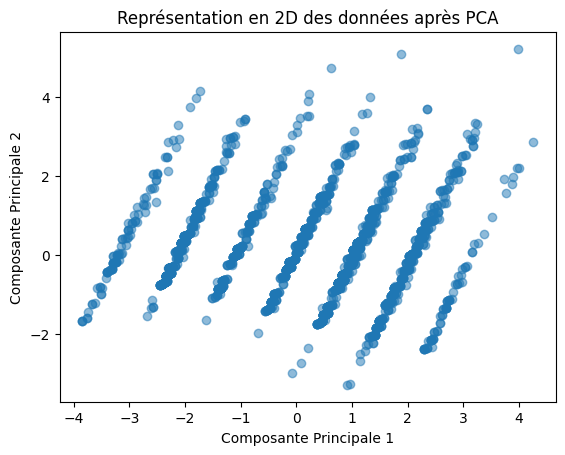

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df_descrip = pd.read_csv('Completed/description_indiv_completed.csv')
df_habit = pd.read_csv('Completed/habitudes_indiv_completed.csv')
df_act = pd.read_csv('Completed/actphys_sedent_completed.csv')
df_act = df_act[df_act['POPULATION'] == 'Pop2 Individu']

# Fusion des DataFrames sur la colonne 'NOIND' (identifiant individuel)
merged_data = pd.merge(df_descrip, df_habit, on='NOIND')
merged_data = pd.merge(merged_data, df_act, on='NOIND')

# Sélection des variables pertinentes pour le clustering
selected_variables = ['collation_freq', 'distributeur_freq', 'restaurationrapide_freq', 'nap', 'sedentarite']

data_for_pca = merged_data[selected_variables]

# Initialisation de la PCA avec 2 composantes (pour visualisation en 2D)
pca = PCA(n_components=2)

# Réduction de dimensionnalité
pca_result = pca.fit_transform(data_for_pca)

# Visualisation en 2D des résultats de la PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Représentation en 2D des données après PCA')
plt.show()

On effectue une analyse de clustering sur un ensemble de données à l'aide de l'algorithme K-means. Une étape cruciale consiste à normaliser les données à l'aide du MinMaxScaler afin de garantir une échelle uniforme.

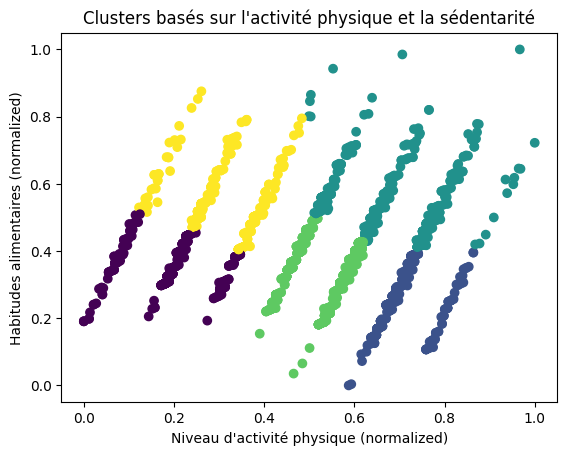

In [ ]:
# Sélection et préparation des données
data_for_clustering = merged_data[selected_variables]

# Initialisation du MinMaxScaler
scaler = MinMaxScaler()

# Normalisation des données
data_for_clustering_normalized = scaler.fit_transform(pca_result)

# Choix du nombre de clusters (utilisation de la méthode du coude ou autre méthode)
nombre_clusters = 5  # À ajuster selon la méthode choisie pour déterminer le nombre optimal de clusters

# Application de l'algorithme K-means avec un nombre de clusters choisi
kmeans = KMeans(n_clusters=nombre_clusters)
kmeans.fit(data_for_clustering_normalized)
clusters = kmeans.predict(data_for_clustering_normalized)

# Visualisation des clusters
plt.scatter(data_for_clustering_normalized[:, 0], data_for_clustering_normalized[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Niveau d\'activité physique (normalized)')
plt.ylabel('Habitudes alimentaires (normalized)')
plt.title('Clusters basés sur l\'activité physique et la sédentarité')
plt.show()

Comme on peut le constater, les regroupements hétérogènes semblent toujours nous aider à mieux distinguer les différents types de personnes. Donc on peut regrouper les individus en clusters homogènes en fonction de leurs habitudes alimentaires et de leur niveau d'activité physique.

## Conclusion

### Analyse réflexive

Nous avons sélectionné quatre tables de l'énorme ensemble de données d'INCA pour ce mini-projet. Après un long processus d'analyse des documents explicatifs et d'examen de l'ensemble de données, nous avons finalement sélectionné des variables pour chaque table qui étaient pertinentes pour les questions que nous posions et nous avons vérifié les données qu'elles contenaient. Cela nous a également permis de réaliser l'importance du prétraitement des données.

Nous avons complété nos réponses aux quatre questions en analysant les relations entre les données des différents tableaux, en finalisant par prédire et classer les habitudes alimentaires et les niveaux d'activité de chaque individu.

La plus grande difficulté que nous ayons rencontrée a été la sélection des jeux de données, car INCA implique tellement de tables et de paramètres que nous avons dû lire attentivement les documentations explicatifs et essayer de comprendre le contexte dans lequel les données ont été collectées. Nous avons d'abord envisagé une table de composition nutritionnelle CIQUAL pour essayer d'élargir les dimensions du jeu de données, mais nous nous sommes ensuite rendu compte que le jeu de données INCA était suffisant pour toutes les analyses que nous allions faire, et nous avons donc fini par choisir quatre tables INCA pour ce mini-projet.

Le plus grand gain serait encore d'apprendre à prétraiter les données, et à remplir les valeurs manquantes en choisissant un modèle prédictif et la manière de remplir les valeurs manquantes est l'aspect sur lequel nous avons passé le plus de temps dans ce mini-projet. D'un autre côté, nous sommes également devenus plus compétents dans les méthodes de prédiction telles que la classification par k-means et la prédiction par la régression linéaire et par arbre aléatoire.

### Proportion de travrail 

La majeure partie de notre travail est le résultat d'une discussion collective et d'une division du travail, c'est pourquoi on donne ici un tableau plus équilibrée de la contribution de chaque personne à chaque chapitre.

|Travails\Personne| ZHU | ZHANG | LI |
|:---:|:---:|:---:|:---:|
|Choix du jeu de données| 40% | 30% | 30% |
|Présentation des données| 50% | 30% | 20% |
|Questions| 30% | 35% | 35% |
|Préparation des données| 40% | 30% | 30% |
|Analyse statistique exploratoire 1D et 2D| 35% | 35% | 30% |
|Analyse exploratoire| 40% | 30% | 30% |




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fea3fe2a-7524-4835-8d17-5e078156b91b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>